In [1]:
import time
import random

In [2]:
class HashTableDoubleHashing:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
    
    def hash1(self, key):
        return key % self.size
    
    def hash2(self, key):
        return 1 + (key % (self.size - 1)) 
    
    def insert(self, key):
        i = 0
        index = self.hash1(key)
        while self.table[index] is not None:
            i += 1
            index = (self.hash1(key) + i * self.hash2(key)) % self.size
        self.table[index] = key
    
    def search(self, key):
        i = 0
        index = self.hash1(key)
        while self.table[index] is not None:
            if self.table[index] == key:
                return True
            i += 1
            index = (self.hash1(key) + i * self.hash2(key)) % self.size
        return False
    
    def remove(self, key):
        i = 0
        index = self.hash1(key)
        while self.table[index] is not None:
            if self.table[index] == key:
                self.table[index] = None
                return True
            i += 1
            index = (self.hash1(key) + i * self.hash2(key)) % self.size
        return False

In [3]:
class HashTableLinearProbing:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
    
    def hash(self, key):
        return key % self.size
    
    def insert(self, key):
        i = 0
        index = self.hash(key)
        while self.table[index] is not None:
            i += 1
            index = (self.hash(key) + i) % self.size
        self.table[index] = key
    
    def search(self, key):
        i = 0
        index = self.hash(key)
        while self.table[index] is not None:
            if self.table[index] == key:
                return True
            i += 1
            index = (self.hash(key) + i) % self.size
        return False
    
    def remove(self, key):
        i = 0
        index = self.hash(key)
        while self.table[index] is not None:
            if self.table[index] == key:
                self.table[index] = None
                return True
            i += 1
            index = (self.hash(key) + i) % self.size
        return False

In [4]:
sizes = [100000, 100010, 100020, 100030, 100040, 100050, 100060, 100070, 100080, 100090, 100100]
num_elements = 100000

In [5]:
def test_hash_tables():
    times = {'double_hashing': {'insert': [], 'search': [], 'remove': []},
             'linear_probing': {'insert': [], 'search': [], 'remove': []}}
    
    for size in sizes:
        table_double_hashing = HashTableDoubleHashing(size)
        table_linear_probing = HashTableLinearProbing(size)
        
        start_time = time.time()
        for i in range(num_elements):
            table_double_hashing.insert(i)
        times['double_hashing']['insert'].append(time.time() - start_time)
        
        start_time = time.time()
        for i in range(num_elements):
            table_linear_probing.insert(i)
        times['linear_probing']['insert'].append(time.time() - start_time)
        
        start_time = time.time()
        for i in range(num_elements):
            table_double_hashing.search(i)
        times['double_hashing']['search'].append(time.time() - start_time)
        
        start_time = time.time()
        for i in range(num_elements):
            table_linear_probing.search(i)
        times['linear_probing']['search'].append(time.time() - start_time)
        
        start_time = time.time()
        for i in range(num_elements):
            table_double_hashing.remove(i)
        times['double_hashing']['remove'].append(time.time() - start_time)
        
        start_time = time.time()
        for i in range(num_elements):
            table_linear_probing.remove(i)
        times['linear_probing']['remove'].append(time.time() - start_time)
    
    return times

In [6]:
results = test_hash_tables()

In [7]:
import matplotlib.pyplot as plt

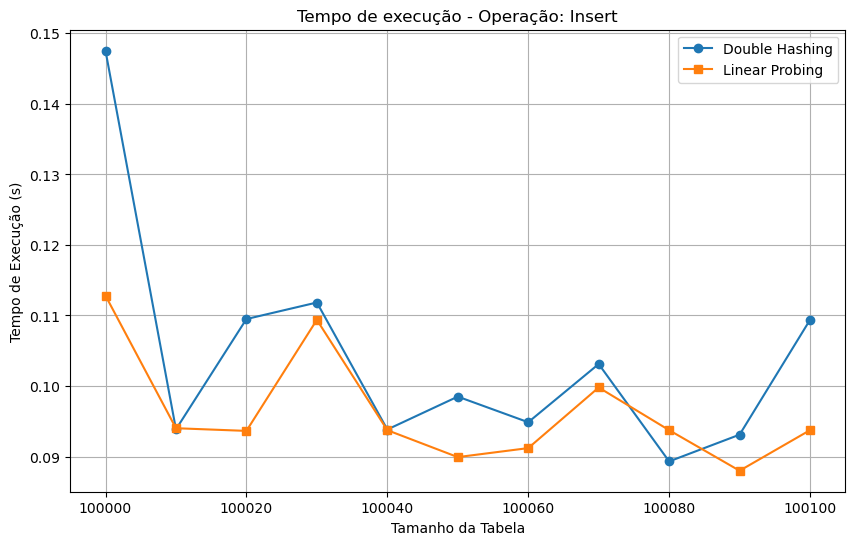

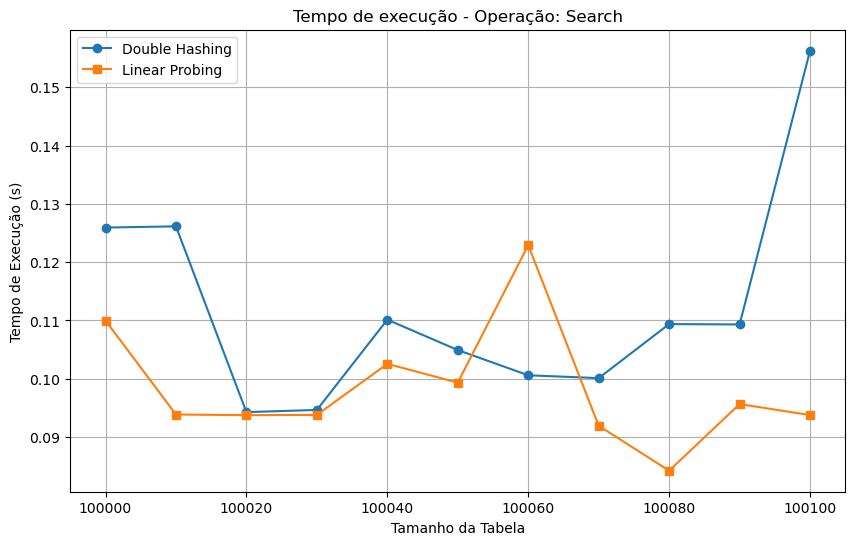

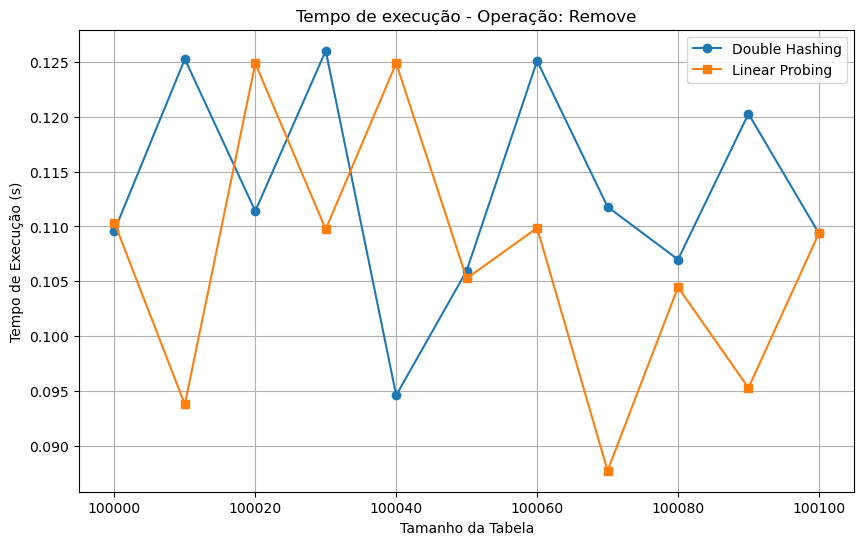

In [8]:
sizes = [100000, 100010, 100020, 100030, 100040, 100050, 100060, 100070, 100080, 100090, 100100]
double_hashing = {
    'insert': [0.14753007888793945, 0.09386587142944336, 0.1094973087310791, 0.11184167861938477, 0.09384012222290039, 0.09850239753723145, 0.09487009048461914, 0.10312104225158691, 0.08931899070739746, 0.0931088924407959, 0.10938692092895508],
    'search': [0.12592673301696777, 0.12613487243652344, 0.0942690372467041, 0.09464859962463379, 0.11012721061706543, 0.1049187183380127, 0.10058999061584473, 0.10010385513305664, 0.1093742847442627, 0.10930633544921875, 0.15625643730163574],
    'remove': [0.10959815979003906, 0.12527060508728027, 0.11139440536499023, 0.12602901458740234, 0.0945882797241211, 0.10595512390136719, 0.12510228157043457, 0.11178731918334961, 0.10697460174560547, 0.12027549743652344, 0.10936212539672852]
}
linear_probing = {
    'insert': [0.11281251907348633, 0.09402227401733398, 0.0936431884765625, 0.10938692092895508, 0.09374308586120605, 0.08992838859558105, 0.09120440483093262, 0.09979534149169922, 0.09374642372131348, 0.0879981517791748, 0.0937495231628418],
    'search': [0.10997462272644043, 0.09386467933654785, 0.0937495231628418, 0.0937950611114502, 0.10254669189453125, 0.09933042526245117, 0.12290644645690918, 0.09193873405456543, 0.08422207832336426, 0.0956573486328125, 0.09375667572021484],
    'remove': [0.11034464836120605, 0.09375739097595215, 0.12487602233886719, 0.10974287986755371, 0.1248941421508789, 0.10524940490722656, 0.10986161231994629, 0.08770561218261719, 0.1044456958770752, 0.09526658058166504, 0.10937690734863281]
}

def plot_results(sizes, double_hashing, linear_probing):
    operations = ['insert', 'search', 'remove']
    for op in operations:
        plt.figure(figsize=(10, 6))
        plt.plot(sizes, double_hashing[op], label='Double Hashing', marker='o')
        plt.plot(sizes, linear_probing[op], label='Linear Probing', marker='s')
        plt.title(f"Tempo de execução - Operação: {op.capitalize()}")
        plt.xlabel("Tamanho da Tabela")
        plt.ylabel("Tempo de Execução (s)")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_results(sizes, double_hashing, linear_probing)